Has few code fragements of Data Visualization using matplotlib

**In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread
devastation and loss of life and about three million people were affected by this natural disaster. As
part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting
refugees from Haiti. Try visualizing this effort using a Line plot:**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Canada.csv")

In [4]:
df = df.loc[:195]
df.drop(df.iloc[:,-8:], inplace = True, axis = 1)

In [5]:
df.shape

(196, 43)

In [6]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,...,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


 Plotting a line graph of immigration from Haiti using df.plot().**

In [7]:
df[df["OdName"] == "Haiti"]

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
75,Immigrants,Foreigners,Haiti,904.0,Latin America and the Caribbean,915.0,Caribbean,902.0,Developing regions,1666.0,...,1652.0,1682.0,1619.0,1598.0,2491.0,2080.0,4744.0,6503.0,5868.0,4152.0


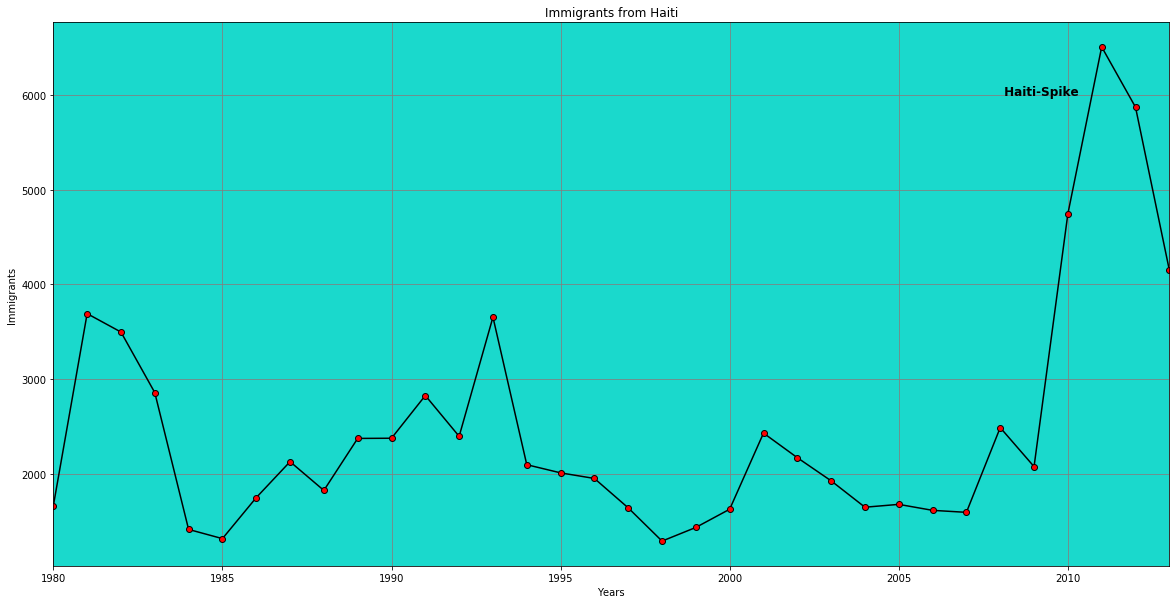

In [24]:
yrs = df[df["OdName"] == "Haiti"].sum()
pd.DataFrame(yrs)
yrs = yrs.iloc[9:]
yrs.rename(columns = {0 : "Immigrants"}, inplace = True)
yrs.plot(figsize=(20,10), style='.-', marker='o', markerfacecolor='red', color = 'black')
plt.text(28, 6000, " Haiti-Spike", color = 'black', fontsize = 12, weight = 'bold')
ax = plt.gca()
ax.set_facecolor((0.1,0.85,0.8))
plt.grid(color = 'gray', linestyle = '-')
plt.xlabel("Years")
plt.ylabel("Immigrants")
plt.title("Immigrants from Haiti")
plt.show()

The data set specific for China and India, and displaying in Data Frame

In [9]:
china = df[df["OdName"] == "China"].sum()
india = df[df["OdName"] == "India"].sum()
china = pd.DataFrame(china)
india = pd.DataFrame(india)


In [10]:
l = [china,india]
china_india = pd.concat(l, axis = 1)

In [11]:
china_india.head()

,0,0
Type,Immigrants,Immigrants
Coverage,Foreigners,Foreigners
OdName,China,India
AREA,935,935
AreaName,Asia,Asia


In [12]:
###**3. Plot the 2 spikes (china, India) on the same graph. Make the figure more readable**

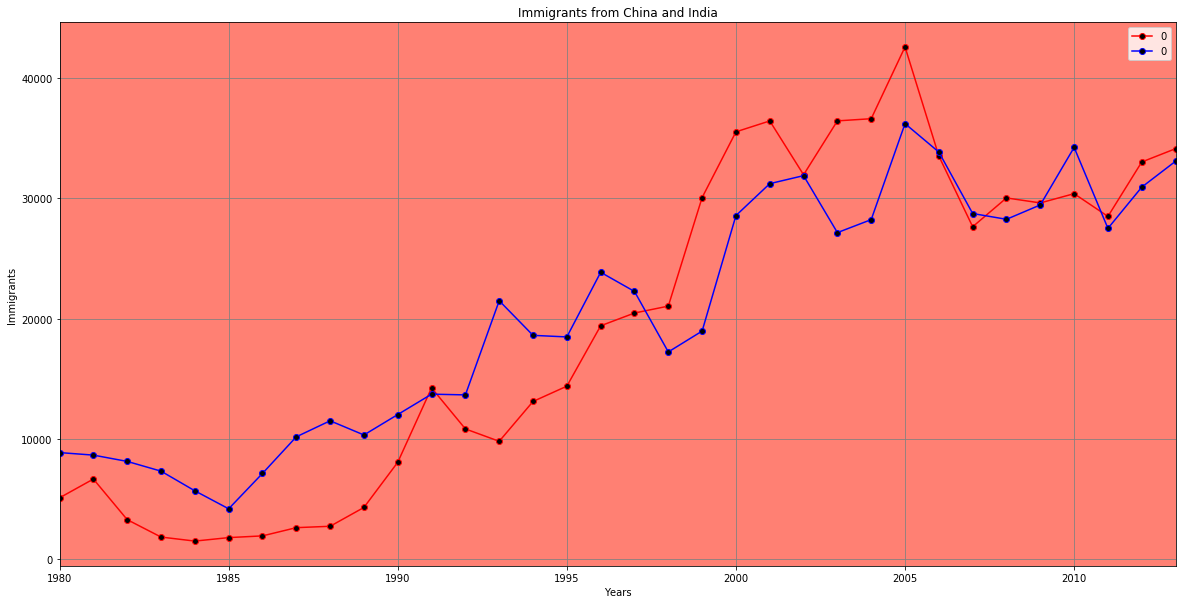

In [13]:
china_india_plt = china_india.iloc[9:,:]
china_india_plt.plot(figsize=(20,10), style='.-', marker='o', markerfacecolor='black', color =["red", "blue"])
ax = plt.gca()
ax.set_facecolor((1,0.5,0.45))
plt.grid(color = 'gray', linestyle = '-')
plt.xlabel("Years")
plt.ylabel("Immigrants")
plt.title("Immigrants from China and India")
plt.show()

###**4. Compare the trend of top 5 countries that contributed the most to immigration to Canada by plotting line graphs**

In [14]:
odname = df["OdName"]
years = df.iloc[:,9:]
x = [odname, years]
df_country = pd.concat(x, axis = 1)
df_country.rename(columns = {"OdName" : "Countries"}, inplace = True)
df_country.set_index("Countries", inplace = True)
df_country["Total"] = df_country.sum(axis=1)
df_country.sort_values(by = "Total", ascending = False, axis = 0, inplace = True)
df_top5 = df_country.head(5)
df_top5

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Countries,,,,,,,,,,,,,,,,,,,,,
India,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,10189.0,11522.0,10343.0,...,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
China,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,2643.0,2758.0,4323.0,...,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
United Kingdom of Great Britain and Northern Ireland,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,21337.0,27359.0,23795.0,...,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0,551500.0
Unknown,44000.0,18078.0,16904.0,13635.0,14855.0,14368.0,13303.0,17304.0,22279.0,27118.0,...,4785.0,4583.0,4348.0,4197.0,3402.0,3731.0,2554.0,1681.0,1484.0,515059.0
Philippines,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,7360.0,8639.0,11865.0,...,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0,511391.0


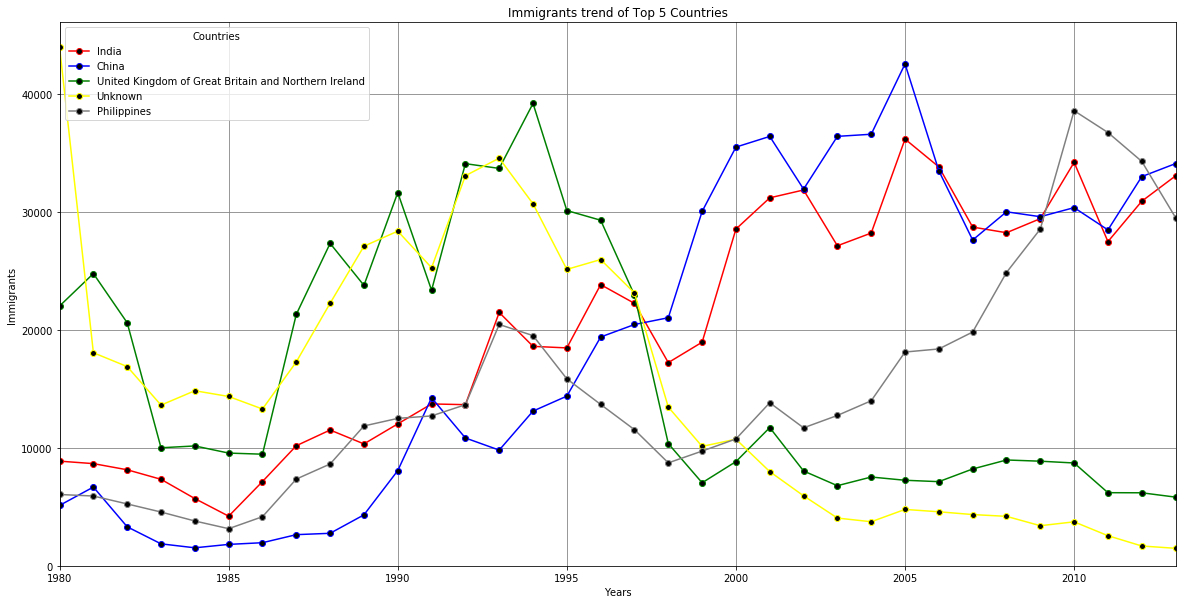

In [20]:
top_5 = df_top5.iloc[:,:-1]
top_5.T.plot(figsize=(20,10), style='.-', marker='o', markerfacecolor='black', color =["red", "blue","green","yellow","gray"])
ax = plt.gca()
ax.set_facecolor((1,1,1))
plt.grid(color = 'gray', linestyle = '-')
plt.ylim(0,)
plt.xlabel("Years")
plt.ylabel("Immigrants")
plt.title("Immigrants trend of Top 5 Countries")
plt.show()